1.

Proszę zaproponować swoją implementację algorytmu genetycznego w celu znalezienia maksimum funkcji $f(x) = sin(100x+0.1) + x^{-x} + 0.2$ w przedziale $[0,1]$, dla $x=0$ proszę przyjąć $f(x) = 0$. Proszę porównać działanie algorytmu:

* Dla kodowania w naturalnym kodzie binarnym i w kodzie Graya

* Dla szansy mutacji wynoszącej 0, 0.1, 0.5 i 1.0

* Dla selekcji ruletkowej i dla selekcji progowej. W selekcji progowej dzielimy populację na dwie grupy: na $\gamma$% najlepszych i na pozostałych. Osobniki w grupie $\gamma$% najlepszych mają równą szansę na reprodukcję, pozostałe mają zerową szansę na reprodukcję. Proszę sprawdzić wyniki dla $\gamma$ wynoszącego 20 i 50.

Za każdym razem proszę podać średnie wyniki dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

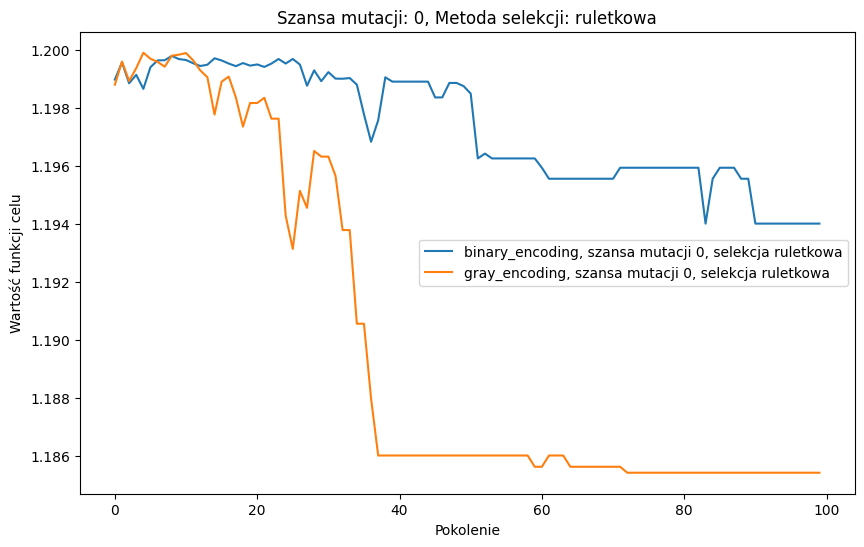

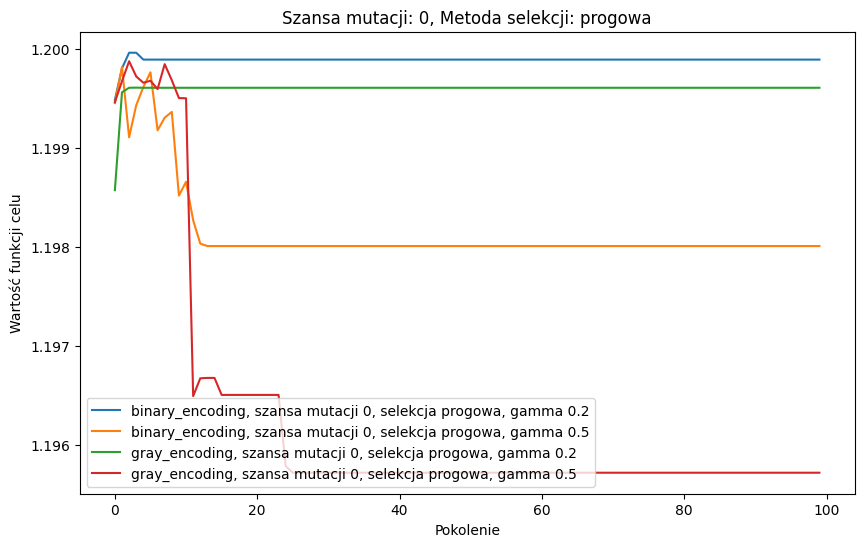

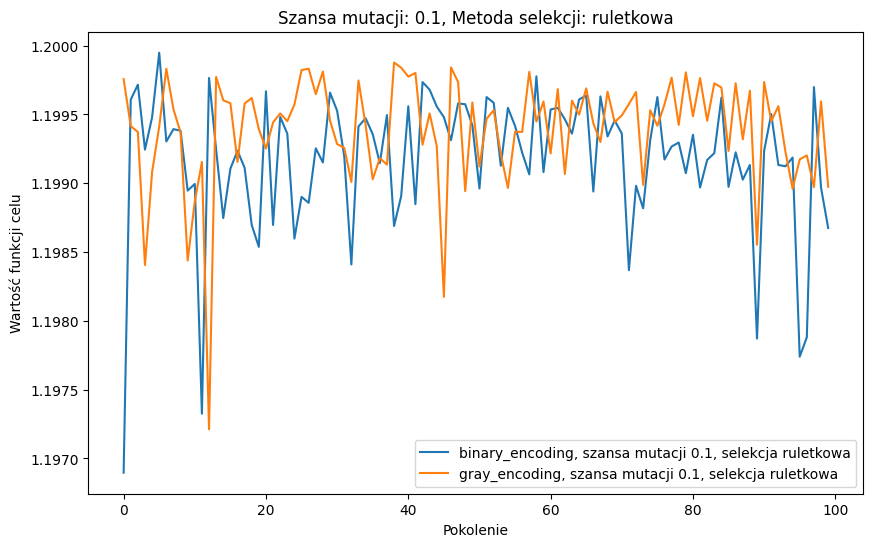

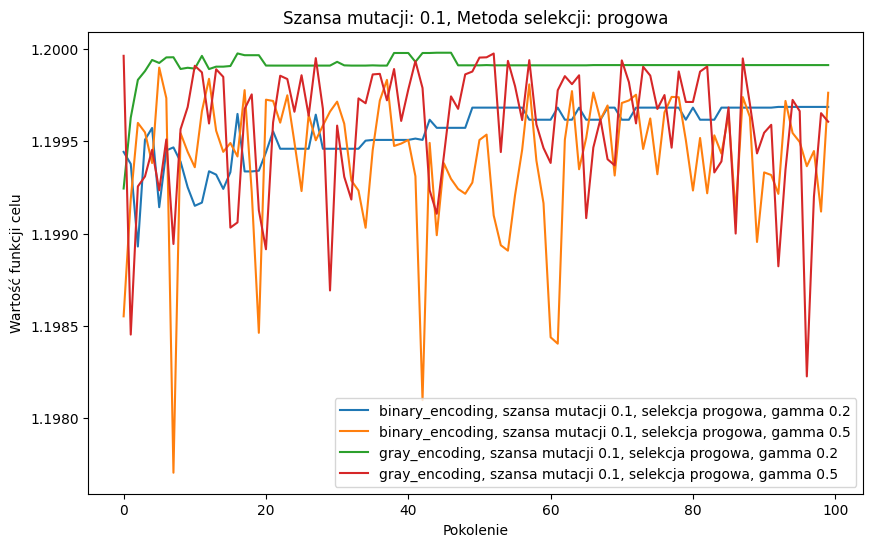

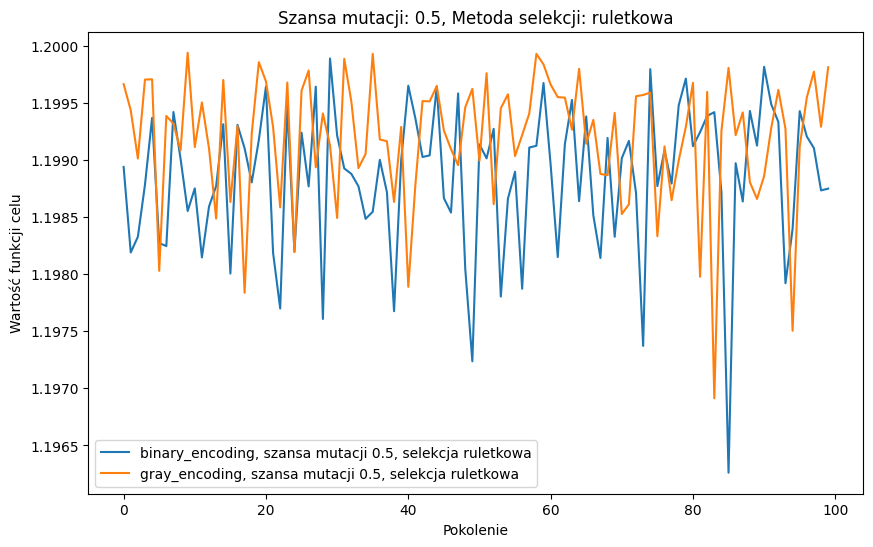

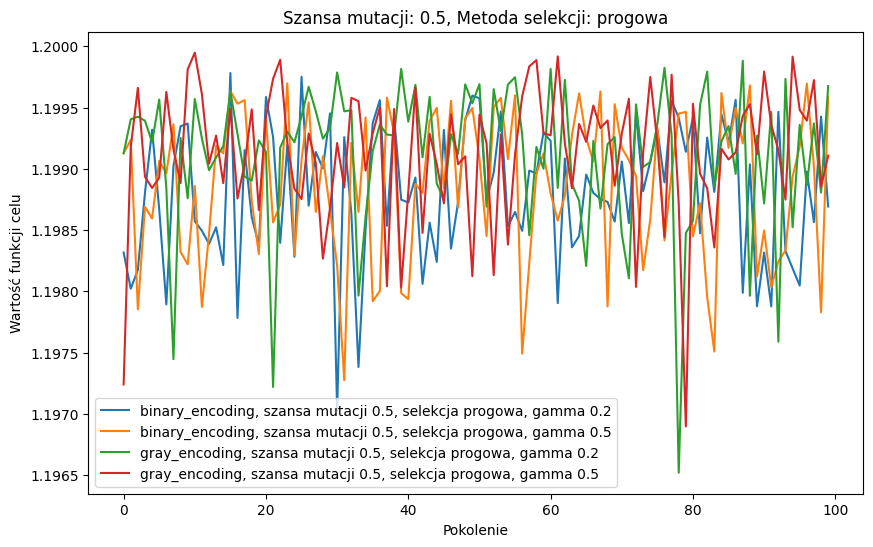

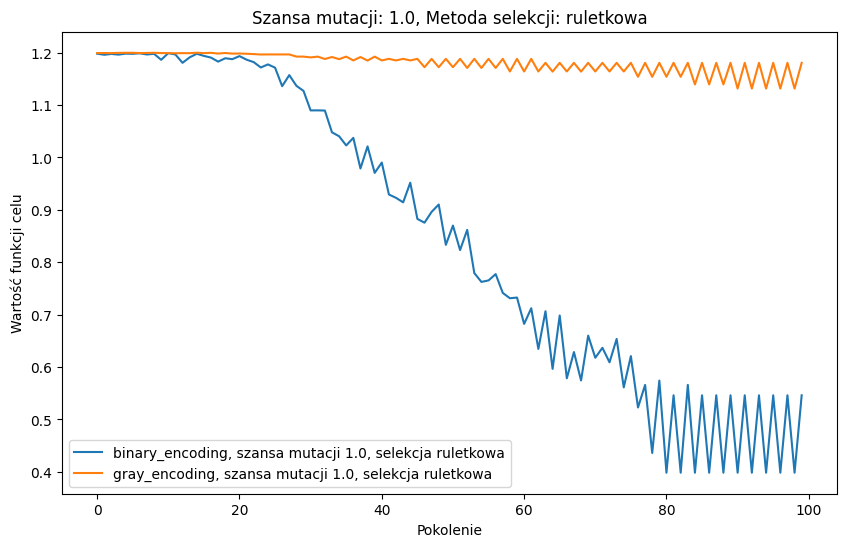

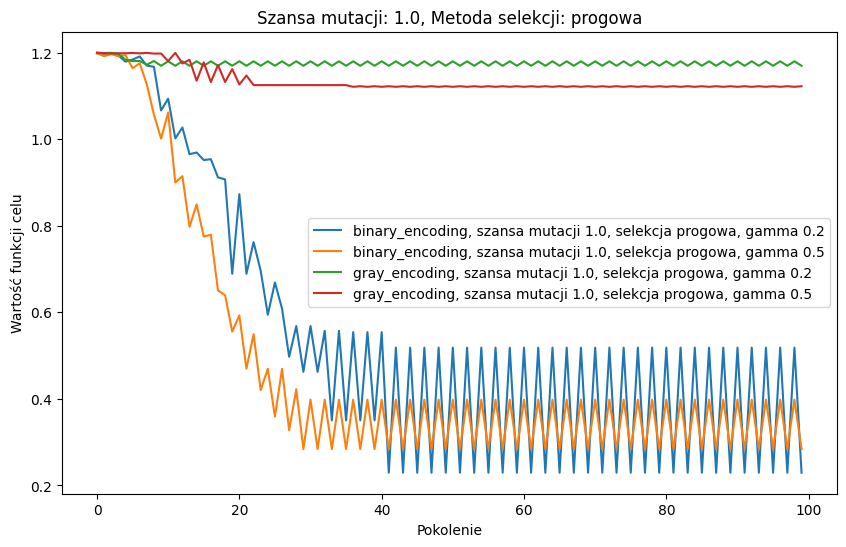

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(100*x+0.1) + x**(-x) + 0.2 if x != 0 else 0

def binary_encoding(x, n_bits):
    required_bits = len(bin(x)) - 2
    bit_width = max(required_bits, n_bits)
    return np.array([int(b) for b in np.binary_repr(x, bit_width)])

def gray_encoding(x, n_bits):
    binary = binary_encoding(x, n_bits)
    gray = np.zeros_like(binary)
    gray[0] = binary[0]
    for i in range(1, len(binary)):
        gray[i] = binary[i-1] ^ binary[i]
    return gray

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def roulette_selection(population, fitness):
    if fitness.min() < 0:
        fitness = fitness - fitness.min() + 1e-9
    return population[np.random.choice(len(population), p=fitness/fitness.sum())]

def threshold_selection(population, fitness, gamma):
    sorted_indices = np.argsort(fitness)
    threshold = int(gamma * len(population))
    best_indices = sorted_indices[-threshold:]
    return population[np.random.choice(best_indices)]

def genetic_algorithm(f, encoding, mutation_rate, selection, gamma=None, n_bits=10, n_generations=100, population_size=100):
    population = np.random.randint(2, size=(population_size, n_bits))
    fitness_history = []
    for _ in range(n_generations):
        fitness = np.array([f(int(''.join(map(str, encoding(int(''.join(map(str, individual))), n_bits))), 2)) for individual in population])
        fitness_history.append(fitness.max())
        new_population = []
        for _ in range(population_size):
            if gamma is None:
                parent1 = selection(population, fitness)
                parent2 = selection(population, fitness)
            else:
                parent1 = selection(population, fitness, gamma)
                parent2 = selection(population, fitness, gamma)
            child = parent1.copy()
            crossover_point = np.random.randint(n_bits)
            child[crossover_point:] = parent2[crossover_point:]
            new_population.append(mutation(child, mutation_rate))
        population = np.array(new_population)
    return fitness_history

# Define all combinations of parameters
encodings = [binary_encoding, gray_encoding]
mutation_rates = [0, 0.1, 0.5, 1.0]
selections = [roulette_selection, threshold_selection]
gammas = [0.2, 0.5]

# Run experiments
experiments = []

for mutation_rate in mutation_rates:
    for selection in selections:
        plt.figure(figsize=(10, 6))  # Create a new figure for each mutation rate and selection method
        for encoding in encodings:
            if selection == roulette_selection:
                experiment_name = f'{encoding.__name__}, szansa mutacji {mutation_rate}, selekcja ruletkowa'
                experiments = [(experiment_name, encoding, mutation_rate, selection, None)]
            else:
                experiments = [(f'{encoding.__name__}, szansa mutacji {mutation_rate}, selekcja progowa, gamma {gamma}', encoding, mutation_rate, selection, gamma) for gamma in gammas]
            for name, _, _, _, gamma in experiments:
                fitness_histories = []
                for _ in range(10):
                    fitness_history = genetic_algorithm(f, encoding, mutation_rate, selection, gamma)
                    fitness_histories.append(fitness_history)
                mean_fitness_history = np.mean(fitness_histories, axis=0)
                plt.plot(mean_fitness_history, label=name)
        plt.legend()
        plt.xlabel('Pokolenie')
        plt.ylabel('Wartość funkcji celu')
        plt.title(f'Szansa mutacji: {mutation_rate}, Metoda selekcji: {"ruletkowa" if selection == roulette_selection else "progowa"}')
        plt.show()

**Wnioski:**

2.

W naszej firmie są cztery działy: A, B, C i D. Generują różne zyski i różne koszty utrzymania, a ich efektywność jest wzajemnie od siebie zależna. Maksymalna ilość pracowników w każdym dziale przy obecnych warunkach to 255 ze względu na ograniczenia budżetu i przestrzeni biurowej. Funkcja miesięcznego zysku (po uwzględnieniu kosztów) w zależności od zatrudnionych w każdym dziale pracowników ma postać:

$Z(A, B, C, D) = \frac{600(A-20)^2(B-35)^2}{C}-(A-50)^2(D-48)^2+D-5000$ tys. dolarów

Proszę zaproponować algorytm genetyczny (kodowanie problemu może być binarne, rzeczywistoliczbowe lub całkowitoliczbowe) i zaproponować wartość (A, B, C, D), dla której zyski firmy będą jak największe.

In [26]:
import numpy as np

def Z(A, B, C, D):
    return 600*(A-20)**2*(B-35)**2/C - (A-50)**2*(D-48)**2 + D

def binary_encoding(x, n_bits):
    required_bits = len(bin(x)) - 2
    bit_width = max(required_bits, n_bits)
    return np.array([int(b) for b in np.binary_repr(x, bit_width)])

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def roulette_selection(population, fitness):
    if fitness.min() < 0:
        fitness = fitness - fitness.min() + 1e-9
    return population[np.random.choice(len(population), p=fitness/fitness.sum())]

def genetic_algorithm(Z, n_bits=8, n_generations=100, population_size=100, mutation_rate=0.1):
    n_variables = 4
    population = np.random.randint(2, size=(population_size, n_variables, n_bits))
    for _ in range(n_generations):
        fitness = np.array([Z(*[int(''.join(map(str, individual[i])), 2) + (1 if i == 2 else 0) for i in range(n_variables)]) for individual in population])
        new_population = []
        for _ in range(population_size):
            parent1 = roulette_selection(population, fitness)
            parent2 = roulette_selection(population, fitness)
            child = parent1.copy()
            crossover_point = np.random.randint(n_bits)
            for i in range(n_variables):
                child[i, crossover_point:] = parent2[i, crossover_point:]
                child[i] = mutation(child[i], mutation_rate)
            new_population.append(child)
        population = np.array(new_population)
    best_individual = population[fitness.argmax()]
    return [int(''.join(map(str, best_individual[i])), 2) + (1 if i == 2 else 0) for i in range(n_variables)]

# Run genetic algorithm
A, B, C, D = genetic_algorithm(Z)
print(f"Optymalną liczbą pracowników w dziale A jest {A}, w dziale B {B}, w dziale C {C}, w dziale D {D}.")

Optymalną liczbą pracowników w dziale A jest 248, w dziale B 244, w dziale C 129, w dziale D 139.


**Wnioski:**